In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['axes.edgecolor']='black'
matplotlib.rcParams['xtick.color']='black'
matplotlib.rcParams['ytick.color']='black'
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["black", "#e94cdc", "0.7"])
matplotlib.rcParams['axes.linewidth']=1.3
matplotlib.rcParams['text.color']='black'
color_names = np.load('/Users/anton.andreytsev/Desktop/new_comp/color_names.npy')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8, 8)

### Задача 1

В файле real_gdp_usa_xlsx имеются квартальные данные о динамике реального ВВП США (сезонно сглаженный ряд) в ценах 2005 года.

(а) Используя фильтр Ходрика — Прескотта, оцените потенциальный
ВВП США на рассматриваемом промежутке.

(б) Сгенерируйте переменную gap, характеризующую отклонение (в процентах) фактического ряда от сглаженного. Постройте ее график, дайте
содержательную интерпретацию, указав примеры периодов экономических кризисов и экономических подъемов.

In [3]:
dat = pd.read_excel('/Users/anton.andreytsev/Desktop/real_gdp_usa.xlsx')

In [37]:
nominal_gdp = hpfilter(dat.gdp)[1]

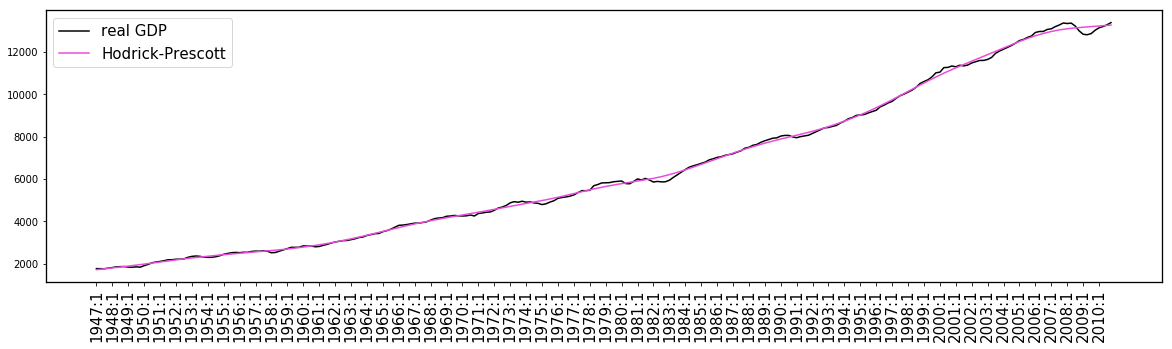

In [43]:
plt.figure(figsize=(20, 5))
plt.plot(dat.gdp, label=u'real GDP');
plt.plot(nominal_gdp, label=u'Hodrick-Prescott');
plt.xticks(np.arange(0, dat.date.shape[0], 4), dat.date[np.arange(0, dat.date.shape[0], 4)], rotation=90, fontsize=15)
plt.legend(fontsize=15);

In [53]:
gap = (dat.gdp - nominal_gdp)/nominal_gdp

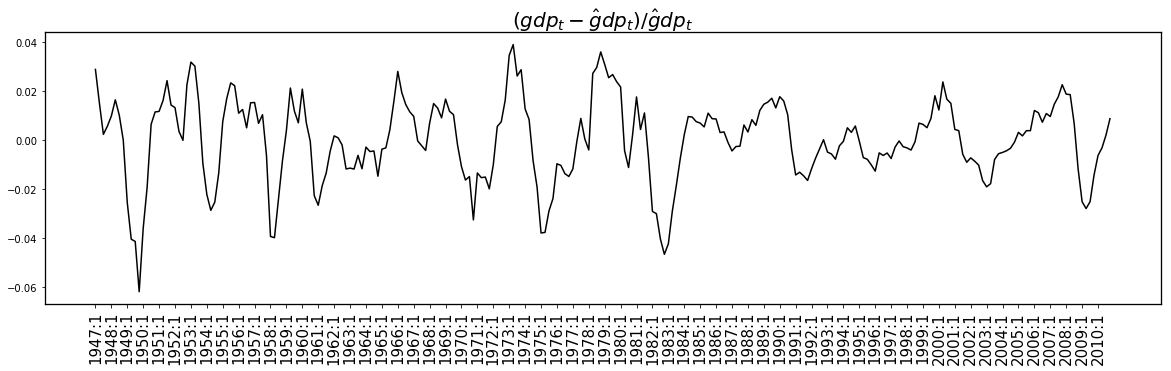

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(gap);
plt.xticks(np.arange(0, dat.date.shape[0], 4), dat.date[np.arange(0, dat.date.shape[0], 4)], rotation=90, fontsize=15);
plt.title(r"$(gdp_{t} - \hat gdp_{t})/\hat gdp_{t}$", fontsize=20);

### Задача 5

В файле garch.csv представлены данные о динамике курса немецкой марки
к доллару США (переменная DM). В соответствии с теорией динамика логарифма обменного курса обычно хорошо описывается процессом случайного блуждания (быть может, с дрейфом): $\ln DM_{t} = \ln DM_{t−1} + \theta + \epsilon_{t}$

Поэтому, создав переменную $DDM_{t} = \ln DM_{t} - \ln DM_{t−1} $, можно перейти к
анализу простой модели $DDM_{t} = \theta + \epsilon_{t}$.

(а) Оцените параметры модели, предполагая, что случайные ошибки в
данной модели описываются процессом ARCH(1).

(б) Оцените параметры модели, предполагая, что случайные ошибки в
данной модели описываются процессом GARCH(1,1).

(в) Проанализировав значимость соответствующих коэффициентов,
объясните, почему модель пункта (б) предпочтительна по отношению к
модели из пункта (а) и по отношению к модели без условной гетероскедастичности.

(г) Для модели из пункта (б) постройте график волатильности валютного
курса.

In [4]:
dat = pd.read_csv('/Users/anton.andreytsev/Desktop/garch.csv')

In [5]:
dat.head()

BP      CD    DATE  DAY       DDM      DM        DY      SF
0  2.2490  0.8547  800102    3       NaN  0.5861  0.004206  0.6365
1  2.2365  0.8552  800103    4 -0.004103  0.5837  0.004187  0.6357
2  2.2410  0.8566  800104    5  0.000856  0.5842  0.004269  0.6355
3  2.2645  0.8538  800107    1  0.001881  0.5853  0.004315  0.6373
4  2.2560  0.8553  800108    2 -0.004967  0.5824  0.004257  0.6329

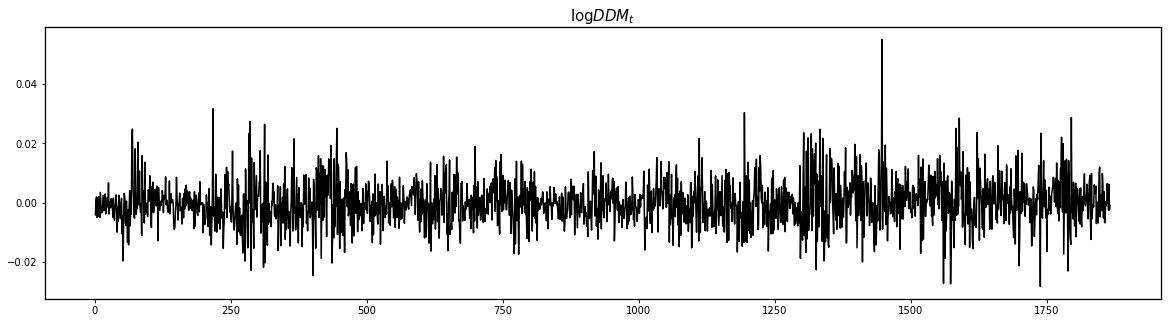

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(dat.DDM);
plt.title(u'$\log DDM_{t}$', fontsize=15);

In [ ]:
model_arch = arch_model(dat.DD, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

In [348]:
# Напишите функцию, которая принимает 2 крайние позиции, координаты корабля
def place_ship(position1, position2):
    _ = []
    if min(position1[0], position2[0]) < max(position1[0], position2[0]):
        for i in range(min(position1[0], position2[0]), max(position1[0], position2[0])+1):
            _.append([i, position1[1]])
    elif min(position1[1], position2[1]) < max(position1[1], position2[1]):
        for i in range(min(position1[1], position2[1]), max(position1[1], position2[1])+1):
            _.append([position1[0], i])
    return _

In [233]:
# Напишите функцию, которая принимает 2 крайние позиции корабля и возвращает список координат, которые входят в его окрестность (включая его позицию)
def vicinity(position1, position2):
    vicinity_ = []
    point_vicinity_dict = {}
    for i in itertools.product(range(10), range(10)):  # Составляем словарь окрестностей для всех точек
        point_vicinity_dict.update({i: [[i[0], i[1]], [i[0]-1, i[1]-1], [i[0]-1, i[1]], [i[0], i[1]-1], [i[0]-1, i[1]+1], [i[0]+1, i[1]-1], 
                                          [i[0]+1, i[1]], [i[0], i[1]+1], [i[0]+1, i[1]+1]]})
        
    if min(position1[0], position2[0]) < max(position1[0], position2[0]):
        for i in range(min(position1[0], position2[0]), max(position1[0], position2[0])+1):
            vicinity_.extend(point_vicinity_dict[tuple([i, position1[1]])])
    elif min(position1[1], position2[1]) < max(position1[1], position2[1]):
        for i in range(min(position1[1], position2[1]), max(position1[1], position2[1])+1):
            vicinity_.extend(point_vicinity_dict[tuple([position1[0], i])])
    _ = []
    for i in vicinity_:
        if i not in _:
            _.append(i)
    # Оставляем только те точки, у которых значения окрестности не выходят за пределы [0, 9]
    b = []
    for i in _:
        if (np.array(i) < 0).sum() > 0 or (np.array(i) > 9).sum() > 0:
            continue
        else:
            b.append(i)
    return b

In [412]:
pole = np.zeros((10, 10)) 
j = np.random.randint(0, 10, size=2)
d = np.random.randint(0, 10, size=2)
# for i in vicinity(j, [j[0]+2, j[1]]):
#     pole[i[0], i[1]] += 1
# for i in vicinity([d[0], d[1]+2], d):
#     pole[i[0], i[1]] += 1
for i in place_ship(j, [j[0]+2, j[1]]):
    pole[i[0], i[1]] += 1
for i in place_ship([d[0], d[1]+2], d):
    pole[i[0], i[1]] += 1

False


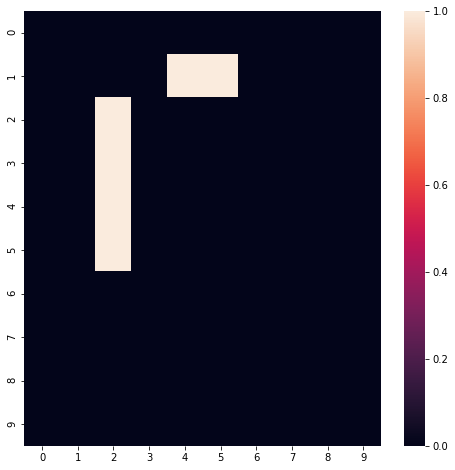

In [425]:
print(ships_intersect(position1_start=j, position1_end=[j[0]+2, j[1]], position2_start=[d[0], d[1]+2], position2_end=d))
sns.heatmap(pole);

In [431]:
def ships_intersect(position1_start, position1_end, position2_start, position2_end):
    ship1 = place_ship(position1_start, position1_end)
    ship2 = place_ship(position2_start, position2_end)
    for i in ship1:
        ship1_vicinity = [[i[0], i[1]], [i[0]-1, i[1]-1], [i[0]-1, i[1]], [i[0], i[1]-1], [i[0]-1, i[1]+1], [i[0]+1, i[1]-1], 
                                          [i[0]+1, i[1]], [i[0], i[1]+1], [i[0]+1, i[1]+1]]
        if sum([j in ship2 for j in ship1_vicinity]) > 0:
            return True
    return False

In [452]:
# Напишите функцию, которая по входным позициям корабля говорит возможен ли корабль с такими координатами крайних точек или нет
def is_ship_possible(position1, position2):
    ship = place_ship(position1, position2)
    b = []
    for i in ship:
        if (np.array(i) < 0).sum() > 0 or (np.array(i) > 9).sum() > 0:
            continue
        else:
            b.append(i)
    return len(b) == len(ship)

In [460]:
for i in itertools.product([[0, 1], [1, 2], [2, 3]], [[100, 100], [-100, -100], [-200, -200]]):
    print(i)

([0, 1], [100, 100])
([0, 1], [-100, -100])
([0, 1], [-200, -200])
([1, 2], [100, 100])
([1, 2], [-100, -100])
([1, 2], [-200, -200])
([2, 3], [100, 100])
([2, 3], [-100, -100])
([2, 3], [-200, -200])


In [480]:
ship1_dimension = 4
ship2_dimension = 6
i, j = (1, 3), (2, 5)
ship1_1 = [list(i), [i[0], i[1]+(ship1_dimension-1)]]
ship1_2 = [list(i), [i[0], i[1]-(ship1_dimension-1)]]
ship1_3 = [list(i), [i[0]+(ship1_dimension-1), i[1]]]
ship1_4 = [list(i), [i[0]-(ship1_dimension-1), i[1]]]
ship1_configurations = np.array([ship1_1, ship1_2, ship1_3, ship1_4])
ship1_configurations = ship1_configurations[np.array([is_ship_possible(q[0], q[1]) for q in ship1_configurations])].tolist()

ship2_1 = [list(j), [j[0], j[1]+(ship2_dimension-1)]]
ship2_2 = [list(j), [j[0], j[1]-(ship2_dimension-1)]]
ship2_3 = [list(j), [j[0]+(ship2_dimension-1), j[1]]]
ship2_4 = [list(j), [j[0]-(ship2_dimension-1), j[1]]]
ship2_configurations = np.array([ship2_1, ship2_2, ship2_3, ship2_4])
ship2_configurations = ship2_configurations[np.array([is_ship_possible(q[0], q[1]) for q in ship2_configurations])].tolist()

In [481]:
ship2_configurations

[[[2, 5], [2, 0]], [[2, 5], [7, 5]]]

In [486]:
for i in itertools.product(ship1_configurations, ship2_configurations):
    a = list(itertools.chain.from_iterable(i))
    print(a[0], a[1], a[2], a[3])

[1, 3] [1, 6] [2, 5] [2, 0]
[1, 3] [1, 6] [2, 5] [7, 5]
[1, 3] [1, 0] [2, 5] [2, 0]
[1, 3] [1, 0] [2, 5] [7, 5]
[1, 3] [4, 3] [2, 5] [2, 0]
[1, 3] [4, 3] [2, 5] [7, 5]


In [592]:
# на поле 10х10
def all_possible_ships_positions(ship1_dimension, ship2_dimension):
    all_configurations = {}
    for i in tqdm.tqdm(itertools.product(range(10), range(10))):
        for j in itertools.product(range(10), range(10)):
            ship1_1 = [list(i), [i[0], i[1]+(ship1_dimension-1)]]
            ship1_2 = [list(i), [i[0], i[1]-(ship1_dimension-1)]]
            ship1_3 = [list(i), [i[0]+(ship1_dimension-1), i[1]]]
            ship1_4 = [list(i), [i[0]-(ship1_dimension-1), i[1]]]
            ship1_configurations = np.array([ship1_1, ship1_2, ship1_3, ship1_4])
            ship1_configurations = ship1_configurations[np.array([is_ship_possible(q[0], q[1]) for q in ship1_configurations])].tolist()

            ship2_1 = [list(j), [j[0], j[1]+(ship2_dimension-1)]]
            ship2_2 = [list(j), [j[0], j[1]-(ship2_dimension-1)]]
            ship2_3 = [list(j), [j[0]+(ship2_dimension-1), j[1]]]
            ship2_4 = [list(j), [j[0]-(ship2_dimension-1), j[1]]]
            ship2_configurations = np.array([ship2_1, ship2_2, ship2_3, ship2_4])
            ship2_configurations = ship2_configurations[np.array([is_ship_possible(q[0], q[1]) for q in ship2_configurations])].tolist()

            for k in itertools.product(ship1_configurations, ship2_configurations):
                _ = list(itertools.chain.from_iterable(k))
                if not ships_intersect(_[0], _[1], _[2], _[3]):# and [_[0], _[1], _[2], _[3]] not in all_configurations:
                    ship1_ = str(list(itertools.chain.from_iterable([_[0], _[1]])))[1:-1].replace(', ', '')
                    if ship1_ not in all_configurations:
                        all_configurations.update({ship1_: [np.array(place_ship(_[2], _[3]))]})
                    else:
                        all_configurations[ship1_].append(np.array(place_ship(_[2], _[3])))
#                     all_configurations.append([_[0], _[1], _[2], _[3]])     
    return all_configurations

In [593]:
a = all_possible_ships_positions(ship1_dimension=3, ship2_dimension=5)

100it [00:10,  9.08it/s]


In [620]:
battle_ground = np.zeros((10, 10))
for i in a['0020'][2]:
    battle_ground[i[0], i[1]] = 1

In [627]:
a['0020'][8]

array([[0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6]])

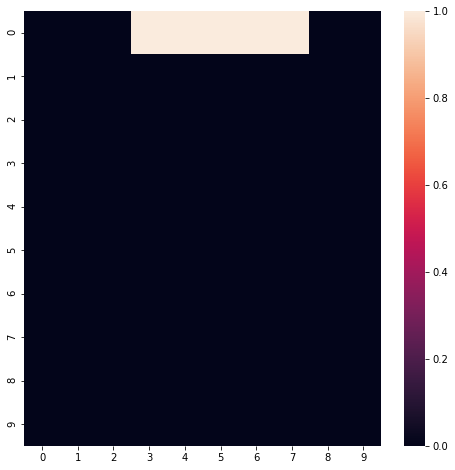

In [621]:
sns.heatmap(battle_ground)

In [595]:
k = 0
for i in a.items():
    print(i)
    if k == 3:
        break

('0020', [array([[0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6]]), array([[0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2]]), array([[0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7]]), array([[0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3]]), array([[0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8]]), array([[0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4]]), array([[0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9]]), array([[0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5]]), array([[0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6]]), array([[0, 6],
       [1, 6],
       [2, 6],
       [3, 6],
       [4, 6]]), array([[0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7]]), array([[0, 7],
       [1, 7],
       [2, 7],
       [3, 7],
       [4, 7]]), array([[0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('7393', [array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4]]), array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0]]), array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5]]), array([[0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1]]), array([[0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6]]), array([[0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2]]), array([[0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7]]), array([[0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3]]), array([[0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8]]), array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4]]), array([[0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4]]), array([[0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9]]), array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
     

In [544]:
k = 10005
battle_ground = np.zeros((10, 10))
for i in place_ship(a[k][0], a[k][1]):
    battle_ground[i[0], i[1]] += 1
for i in place_ship(a[k][2], a[k][3]):
    battle_ground[i[0], i[1]] += 1

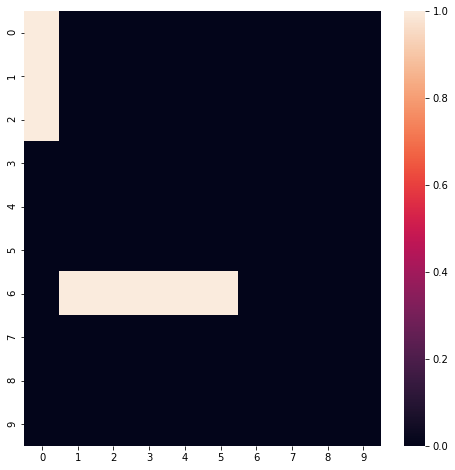

In [545]:
sns.heatmap(battle_ground)